## Demo of animation capability of IPython Notebook

In [1]:
# Necessary for interactive plots to function properly
%matplotlib notebook

In [2]:
# Library imports, note widgets, interact, and display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import HTML, display

In [3]:
# Sets relevant parameters for animation
import matplotlib
matplotlib.rc('animation', html='html5')
plt.rcParams['animation.ffmpeg_path'] = 'C:/Users/Daning Huang/FFmpeg/bin/ffmpeg.exe'

### Interactive widgets: Varying step size for ODE algorithms

Using explicit Euler and 2nd-order Runge-Kutta algorithms to solve

$$
\dot y = exp(-2t)
$$

<IPython.core.display.Javascript object>


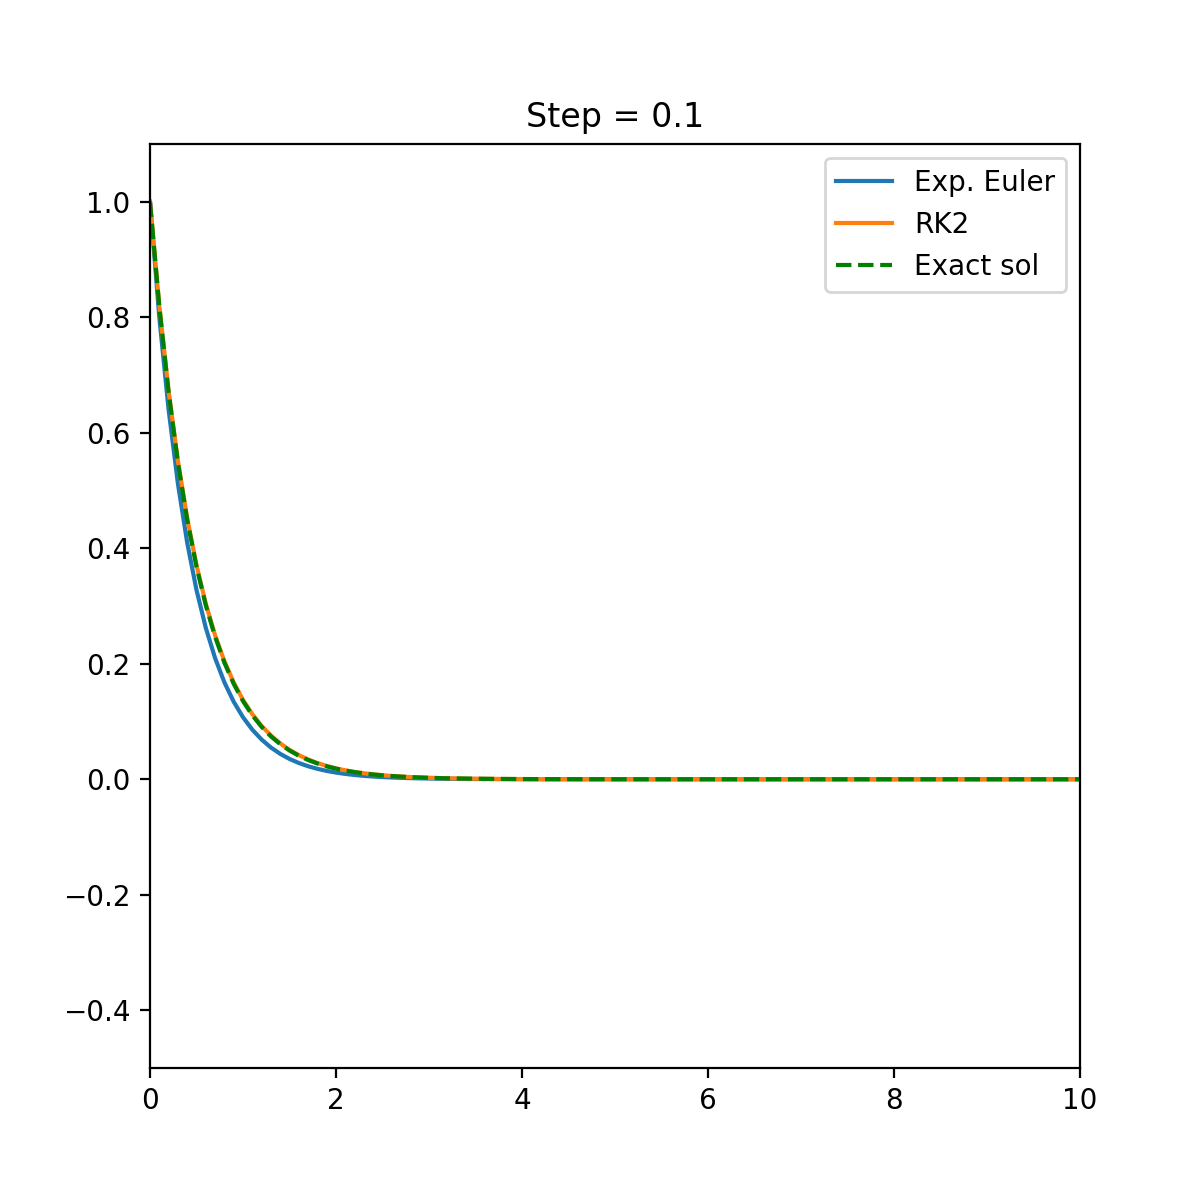

interactive(children=(FloatSlider(value=0.1, description='step', max=1.0, min=0.1), Output()), _dom_classes=('…

In [4]:
# The use of widgets is straight-forward.  See the last line of this cell.
# Note that the widgets does not work with the nbviewer website as of 08/14/2019.

fig, ax = plt.subplots(1, figsize=(6, 6))
T  = 10.
y0 = 1.0

func = lambda y, t: -2*y
fsol = lambda t: np.exp(-2*t)

def update_plot(step=0.1):
    N  = int(T/step)+1
    ts = np.linspace(0, T, N)
    y_ee = np.zeros((N,))
    y_ee[0] = y0
    y_rk = np.zeros((N,))
    y_rk[0] = y0

    for _i in range(1,N):
        _t = ts[_i-1]

        # Exp. Euler
        y_ee[_i] = y_ee[_i-1] + step * func(y_ee[_i-1], _t)

        # RK2
        _k1 = step * func(y_rk[_i-1], _t)
        _k2 = step * func(y_rk[_i-1]+0.5*_k1, _t+0.5*step)
        y_rk[_i] = y_rk[_i-1] + _k2

    ax.clear()
    ax.plot(ts, y_ee, label='Exp. Euler')
    ax.plot(ts, y_rk, label='RK2')
    ax.plot(ts, fsol(ts), 'g--', label='Exact sol')
    ax.set_title('Step = {0}'.format(step))
    ax.set_xlim(0, T)
    ax.set_ylim(-0.5, 1.1)
    ax.legend(loc=1)
    plt.show()

widgets.interactive(update_plot, step=(0.1,1,0.1))

### Animation: Travelling wave

An illustration of the d'Alembert solution for 1D string vibration.

In [5]:
# Preparation of the animation data

L  = 1.0
T  = 4.0
dt = 0.01
c  = 0.5
Nx = 501
Nt = int(T/dt)+1
x  = np.linspace(0, L, Nx)
t  = np.linspace(0, T, Nt)
u  = np.zeros((Nt, Nx))

def func(x):
    _f = np.zeros_like(x)
    _m = (x >= 0.45) & (x < 0.5)
    _f[_m] = 20*(x[_m]-0.45)
    _m = (x >= 0.5) & (x < 0.55)
    _f[_m] = 20*(0.55-x[_m])
    return _f

def Func(x):
    _f = np.zeros((Nx,))
    _x = np.mod(x, 2)
    _m = _x <= 1
    _f[_m] = func(_x[_m])
    _f[~_m] = -func(np.abs(_x[~_m]-1))
    return _f

for _i in range(Nt):
    u[_i] = 0.5 * (Func(x-c*t[_i]) + Func(x+c*t[_i]))

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data(x, u[i])
    time_text.set_text('t={0:3.2f}s'.format(i*dt))
    return line, time_text

<IPython.core.display.Javascript object>


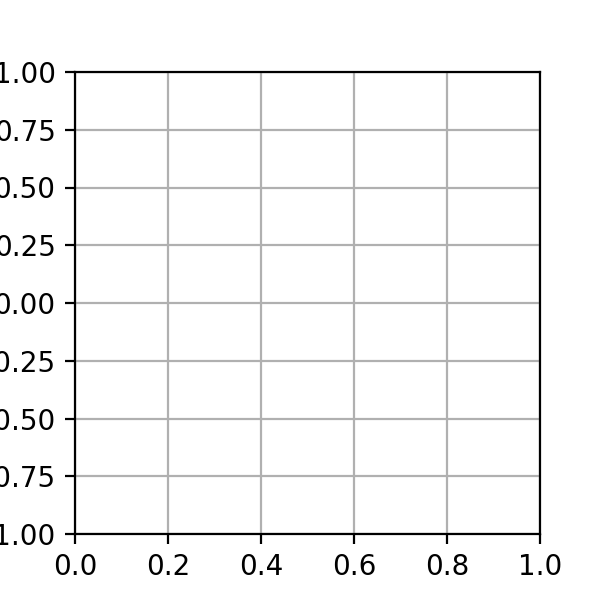

In [6]:
# Initializing the figure
# For FFmpeg, the figure size needs to be quite small

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 1), ylim=(-1.0, 1.0))
ax.grid()
line, = ax.plot([], [], '-', lw=2)
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [ ]:
# Interactive animation, which could be fairly large.  Not recommended.
HTML(ani.to_jshtml())

In [7]:
# Generate the animation that can be embedded in the nbviewer website.
# This requires the FFmpeg library

ani = animation.FuncAnimation(fig, animate, np.arange(0, Nt), interval=25, blit=True, init_func=init)
ani